In [0]:
import numpy as np
import pylab as plt
import pandas as pd
import scipy
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [0]:
#from StringIO import StringIO
#indat=StringIO(uploaded["baker_willman_2015.dsphs_nrr.csv"])
#df = pd.read_csv(indat, sep=",")


In [0]:
def Mv2Lv(Mv):
  Mvsun=+4.8
  return 10**(-(Mv-Mvsun)/2.5)

In [0]:
#Data from Baker & Willman (2015), Catelan (2009), Harris (1996, 2010)
Nab=np.array([54,214,396,134,47,106,26,47,18,5,1,7,6,3])
Nc=np.array([15,30,119,88,7,33,10,35,5,4,0,8,3,0])
Mv=np.array([-9.1,-8.8,-13.4,-11.1,-12.,-9.8,-9.3,-8.8,-8.6,-5.5,-4.2,-6.3,-6.6,-5.8])
dd=dict(Nab=Nab,Mv=Mv,Nc=Nc,N=Nab+Nc,logNab=np.log10(Nab),logN=np.log10(Nab+Nc))
df=pd.DataFrame(dd)
#for keys in df.keys(): print keys


Text(0,0.5,u'$logN_{RR}$')

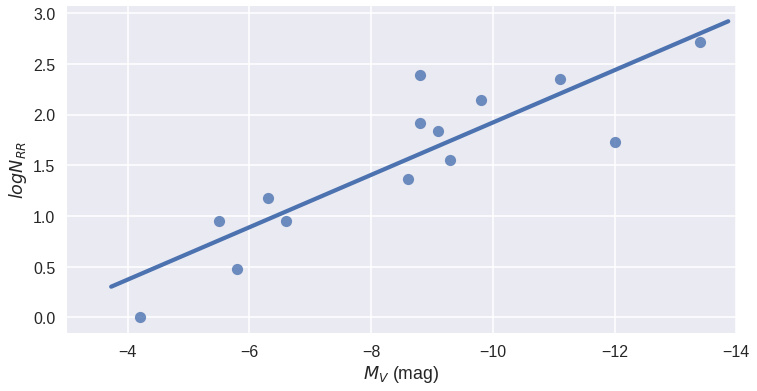

In [33]:
sns.set_context("poster")
fig=plt.figure(1,figsize=(12,6))
ax=fig.add_subplot(111)
sns.regplot(x="Mv", y="logN", data=df, ax=ax, ci=None);
sns.regplot(x="Mv", y="logNab", data=df, ax=ax, ci=None);
ax.set_xlim(-3,-14)
ax.set_xlabel("$M_V$ (mag)")
ax.set_ylabel("$logN_{RR}$")

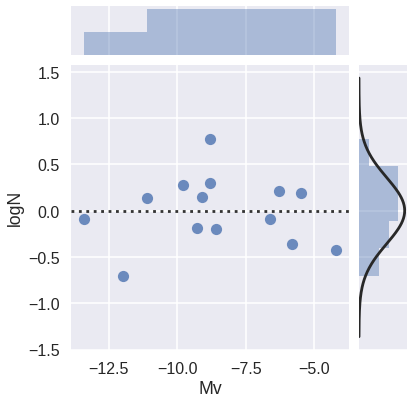

In [32]:
#fig=plt.figure(1,figsize=(10,5))
sns.jointplot(x="Mv", y="logN", data=df, kind="resid");


Maximum at -8.71699106877


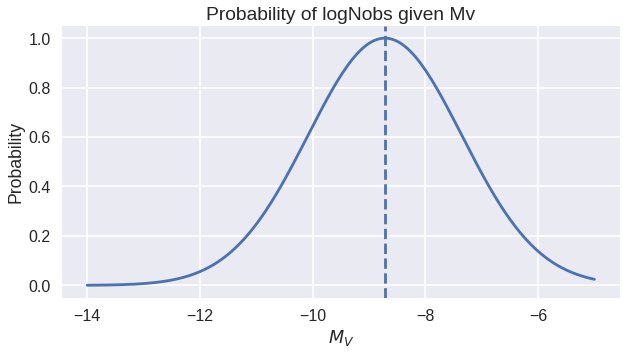

In [76]:
# Empirical logN-Mv relationship
a,b=-0.2402,-0.6167
sig=0.328 #gaussian noise std.dev.
Mv=np.linspace(-14.,-5.,200)
logNteo= a*Mv +b

# Observation
logNobs=np.log10(50)

# Probability of observing logNobs given logN(Mv)=aMv+b  + Gaussian noise
P_logN_given_Mv=np.exp( -(logNobs-logNteo)**2/(2*sig**2))

# Plot
plt.figure(1,figsize=(10,5))
plt.plot(Mv,P_logN_given_Mv)
plt.axvline((logNobs-b)/a,ls='--')
print "Maximum at",(logNobs-b)/a
plt.xlabel("$M_V$")
plt.ylabel("Probability")
plt.title("Probability of logNobs given Mv");



Likelihood Maximum at -6.73  (Lv=4.1e+04 Lsun)
Posterior Maximum at -6.31  (Lv=2.8e+04 Lsun)


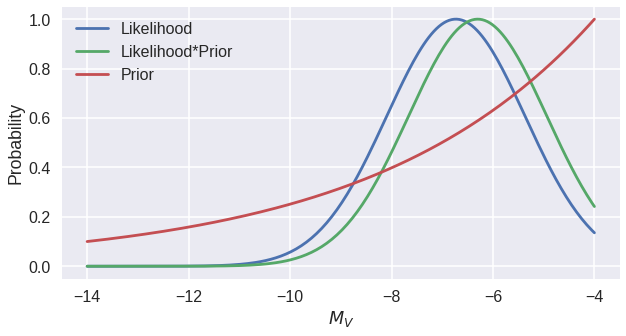

In [86]:
# Empirical logN-Mv relationship
a,b=-0.2402,-0.6167
sig=0.328 #gaussian noise std.dev.
Mv=np.linspace(-14.,-4.,200)
logNteo= a*Mv +b

# Observation
logNobs=np.log10(10)

# Probability of observing logNobs given logN(Mv)=aMv+b  + Gaussian noise (LIKELIHOOD)
P_logN_given_Mv=np.exp( -(logNobs-logNteo)**2/(2*sig**2))
Mv_like_max=(logNobs-b)/a

# Prior PDF
prior= 10**(0.1*(Mv+5.))   #Koposov et al. 2008
# Probability of Mv given data (logNobs):
posterior = prior*P_logN_given_Mv
Mv_posterior_max=Mv[np.argmax(posterior)]

# Plot
plt.figure(1,figsize=(10,5))
plt.plot(Mv,P_logN_given_Mv/np.max(P_logN_given_Mv),label='Likelihood')
plt.plot(Mv,posterior/np.max(posterior),label='Likelihood*Prior')
plt.plot(Mv,prior/np.max(prior),label='Prior')
plt.xlabel("$M_V$")
plt.ylabel("Probability")

#plt.axvline(Mv_like_max,ls='--')
#plt.axvline(Mv_posterior_max,ls='--',color="green")

plt.legend()



print "Likelihood Maximum at %.2f  (Lv=%.2g Lsun)" % (Mv_like_max,Mv2Lv(Mv_like_max))
print "Posterior Maximum at %.2f  (Lv=%.2g Lsun)" % (Mv_posterior_max,Mv2Lv(Mv_posterior_max))


